In [12]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Define the number of samples to generate
num_samples = 1000

# Generate synthetic timestamps
start_date = datetime(2020, 1, 1)
end_date = datetime(2022, 12, 31)
timestamps = [start_date + timedelta(days=np.random.randint((end_date - start_date).days)) for _ in range(num_samples)]

# Generate synthetic features related to the health and performance of the water distribution system
# Example features: pressure, flow rate, temperature, valve status, pump status, etc.
pressure = np.random.normal(loc=70, scale=10, size=num_samples)
flow_rate = np.random.normal(loc=100, scale=20, size=num_samples)
temperature = np.random.normal(loc=20, scale=5, size=num_samples)
valve_status = np.random.choice([0, 1], size=num_samples, p=[0.2, 0.8])
pump_status = np.random.choice([0, 1], size=num_samples, p=[0.1, 0.9])

# Generate synthetic target labels indicating whether a failure or leak occurred (1) or not (0)
# Example: based on abnormal pressure readings or sudden drops in flow rate
target = np.zeros(num_samples)
for i in range(num_samples):
    if pressure[i] < 60 or pressure[i] > 80 or flow_rate[i] < 80:
        target[i] = 1

# Create a DataFrame to store the simulated data
data = pd.DataFrame({
    'timestamp': timestamps,
    'pressure': pressure,
    'flow_rate': flow_rate,
    'temperature': temperature,
    'valve_status': valve_status,
    'pump_status': pump_status,
    'target': target
})

# Save the simulated data to a CSV file
data.to_csv('simulated_data.csv', index=False)


In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [14]:
# Load historical data
historical_data = pd.read_csv('simulated_data.csv')

# Drop the 'timestamp' column
historical_data.drop(columns=['timestamp'], inplace=True)

# Define features (X) and target (y)
X = historical_data.drop(columns=['target'])
y = historical_data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the predictive model (Random Forest Classifier as an example)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print predictions and actual labels
print("\nPredictions vs Actual Labels:")
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(result_df.head(10))  # Display the first 10 predictions for comparison

# Additional evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report:")
print(classification_report(y_test, predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))



Accuracy: 1.0

Predictions vs Actual Labels:
     Actual  Predicted
521     1.0        1.0
737     1.0        1.0
740     1.0        1.0
660     1.0        1.0
411     1.0        1.0
678     1.0        1.0
626     0.0        0.0
513     1.0        1.0
859     0.0        0.0
136     0.0        0.0

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       108
         1.0       1.00      1.00      1.00        92

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Confusion Matrix:
[[108   0]
 [  0  92]]


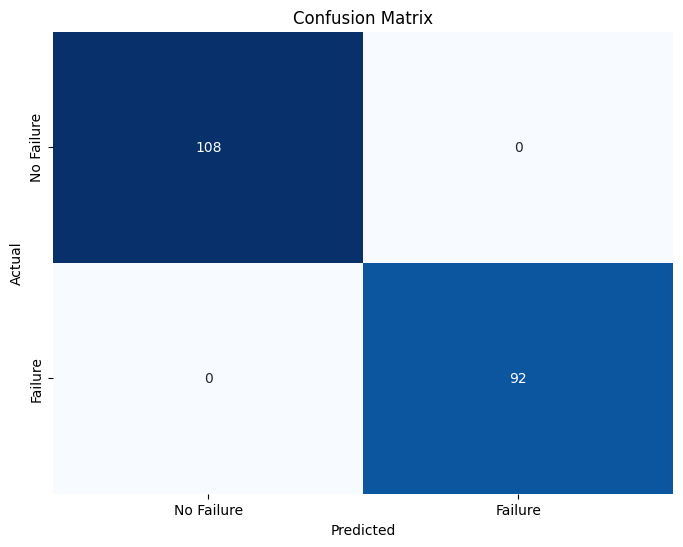

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0.5, 1.5], ["No Failure", "Failure"])
plt.yticks([0.5, 1.5], ["No Failure", "Failure"])
plt.show()



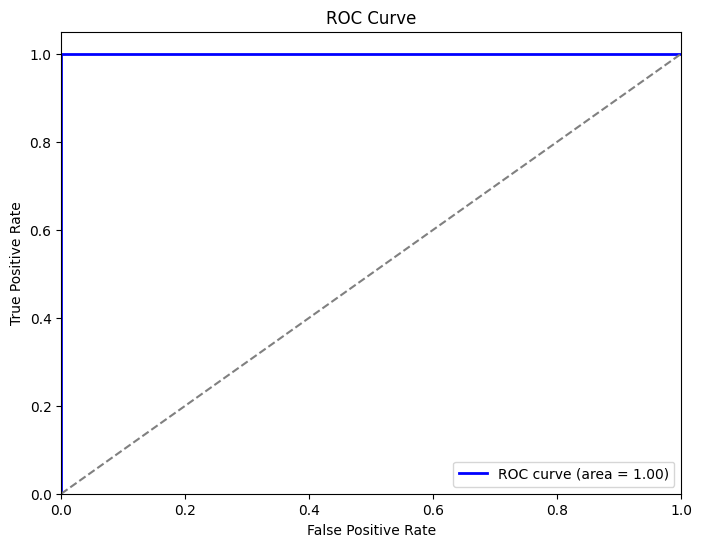

In [16]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


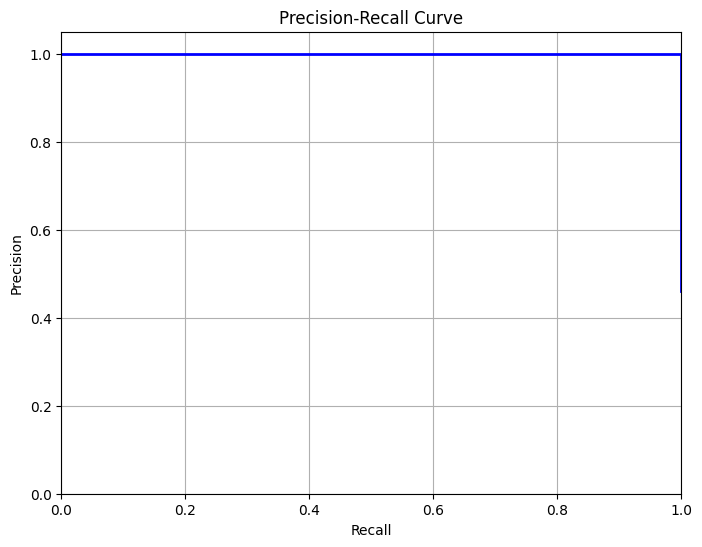

In [17]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, predictions)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.show()
